In [2]:
import re
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
#import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Reading the data
df = pd.read_csv('customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
nums_rows, nums_columns = df.shape
print(f'Number of rows: {nums_rows}\nNumber of columns: {nums_columns}')


Number of rows: 8469
Number of columns: 17


In [5]:
#Checking duplicate line
duplicate = df.duplicated().any()
duplicate

False

In [6]:
df.info()
cat_cols  = df.select_dtypes(['object']).columns
int_cols  = df.select_dtypes(['int64']).columns
float_cols = df.select_dtypes(['float']).columns
print(cat_cols)
print(int_cols)
print(float_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [7]:



#Convert to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], format = '%Y-%m-%d')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], format = '%Y-%m-%d %H:%M:%S')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], format = '%Y-%m-%d %H:%M:%S')

In [8]:
df_ticket = df.drop(columns = ['Ticket ID'], axis = 1)


In [9]:
#Cleaning data
df_ticket['Resolution'] = df_ticket['Resolution'].fillna('None')
df_ticket['First Response Time'] = df_ticket['First Response Time'].fillna('No response')
df_ticket['Time to Resolution'] = df_ticket['Time to Resolution'].fillna('No resolution')
df_ticket['Customer Satisfaction Rating'] = df_ticket['Customer Satisfaction Rating'].fillna('No rating')

In [10]:
df_ticket.isnull().sum()


Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [11]:
print(df_ticket['Customer Age'].max())
print(df_ticket['Customer Age'].min())

70
18


In [12]:
age = []
for i in df_ticket['Customer Age']:
    if i<=30:
        age.append('Young Customer')
    elif 30<i<55:
        age.append('Middle Age Customer')
    else:
        age.append('Old Customer')
df_ticket['Type of Customer'] = age

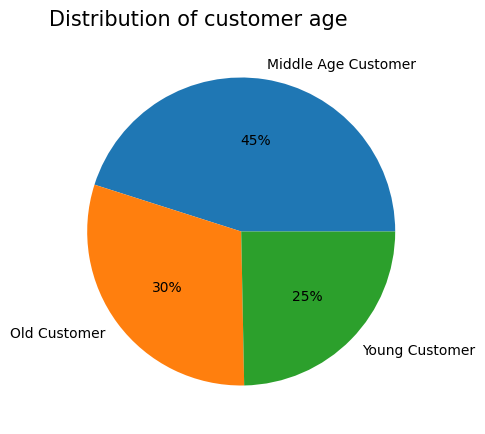

In [13]:
chart_age = df_ticket['Type of Customer'].value_counts()
chart_gen = df_ticket['Customer Gender'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(chart_age, labels = chart_age.index, autopct='%.0f%%')
plt.title('Distribution of customer age', loc = 'left', pad = 10, size = 15)
plt.show()

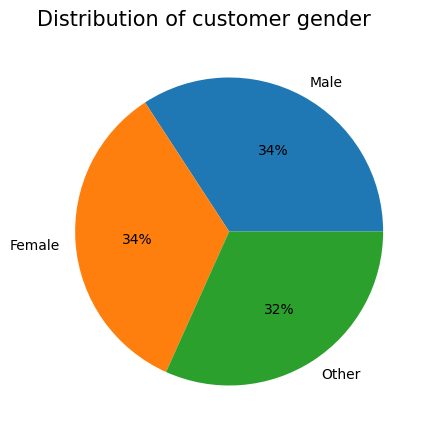

In [14]:
chart_gen = df_ticket['Customer Gender'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(chart_gen, labels = chart_gen.index, autopct='%.0f%%')
plt.title('Distribution of customer gender', loc = 'left', pad = 10, size = 15)
plt.show()

In [15]:
unique = len(df_ticket['Product Purchased'].unique())
print(f' Total of products was purchased: {unique}')

 Total of products was purchased: 42


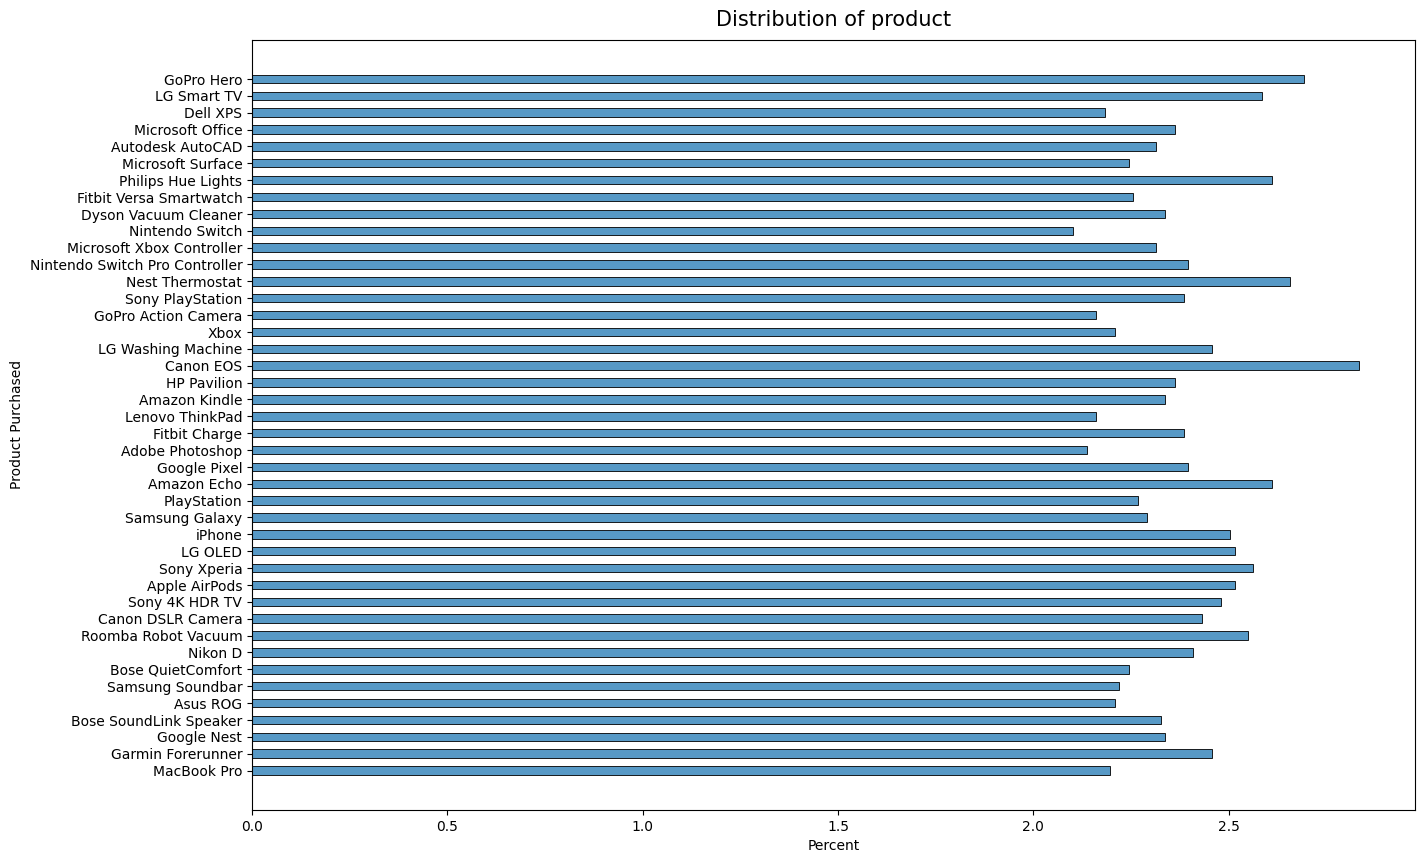

In [16]:

#Plot chart
plt.figure(figsize = (15,10))
sns.histplot(data = df_ticket, y = 'Product Purchased', stat = 'percent', shrink = 0.5)
plt.title('Distribution of product', loc = 'center', pad = 10, size = 15)
plt.show()

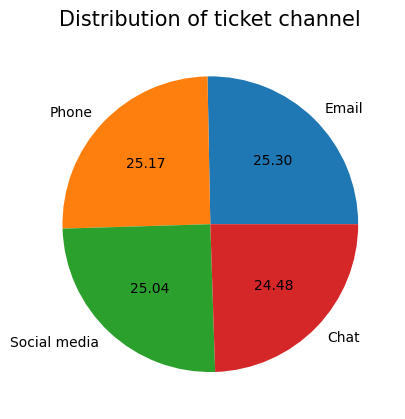

In [17]:
chart_chan = df_ticket['Ticket Channel'].value_counts()
plt.pie(chart_chan, labels = chart_chan.index, autopct = '%.2f')
plt.title('Distribution of ticket channel', loc = 'center', pad = 10, size = 15)
plt.show()

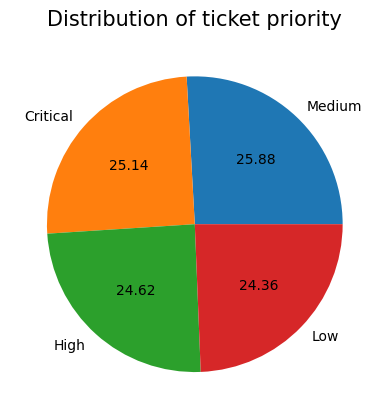

In [18]:

chart_prio = df_ticket['Ticket Priority'].value_counts()
plt.pie(chart_prio, labels = chart_prio.index, autopct = '%.2f')
plt.title('Distribution of ticket priority', loc = 'center', pad = 10, size = 15)
plt.show()

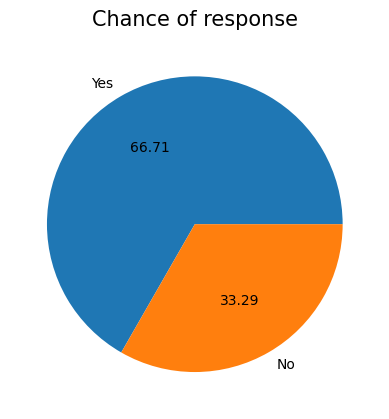

In [19]:
chance = []
for i in df_ticket['First Response Time']:
    if i == 'No response':
        chance.append('No')
    else:
        chance.append('Yes')
df_ticket['Response'] = chance
chart_res = df_ticket['Response'].value_counts()
plt.pie(chart_res, labels = chart_res.index, autopct = '%.2f')
plt.title('Chance of response', loc = 'center', pad = 10, size = 15)
plt.show()

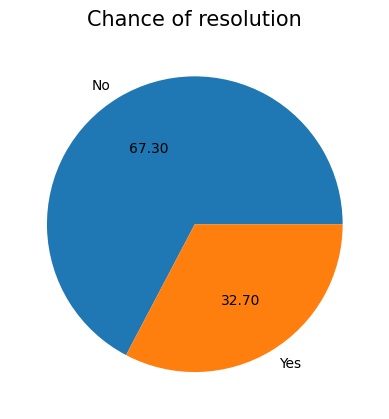

In [20]:
chance_r = []
for i in df_ticket['Time to Resolution']:
    if i == 'No resolution':
        chance_r.append('No')
    else:
        chance_r.append('Yes')
df_ticket['Resolution_bin'] = chance_r
chart_re = df_ticket['Resolution_bin'].value_counts()
plt.pie(chart_re, labels = chart_re.index, autopct = '%.2f')
plt.title('Chance of resolution', loc = 'center', pad = 10, size = 15)
plt.show()

In [21]:
#Convert 'Customer Satisfaction Rating' columns into object type
df_ticket['Customer Satisfaction Rating'] = df_ticket['Customer Satisfaction Rating'].astype('object')
df_ticket['Customer Satisfaction Rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8469 entries, 0 to 8468
Series name: Customer Satisfaction Rating
Non-Null Count  Dtype 
--------------  ----- 
8469 non-null   object
dtypes: object(1)
memory usage: 66.3+ KB


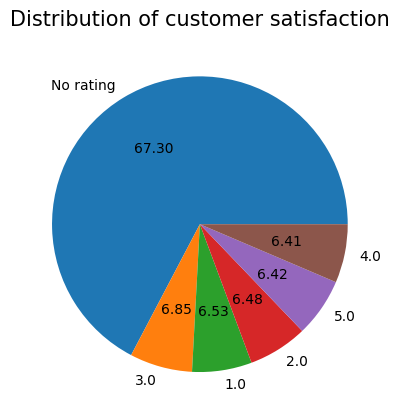

In [22]:
chart_satis = df_ticket['Customer Satisfaction Rating'].value_counts()
plt.pie(chart_satis, labels = chart_satis.index, autopct = '%.2f')
plt.title('Distribution of customer satisfaction', loc = 'center', pad = 10, size = 15)
plt.show()

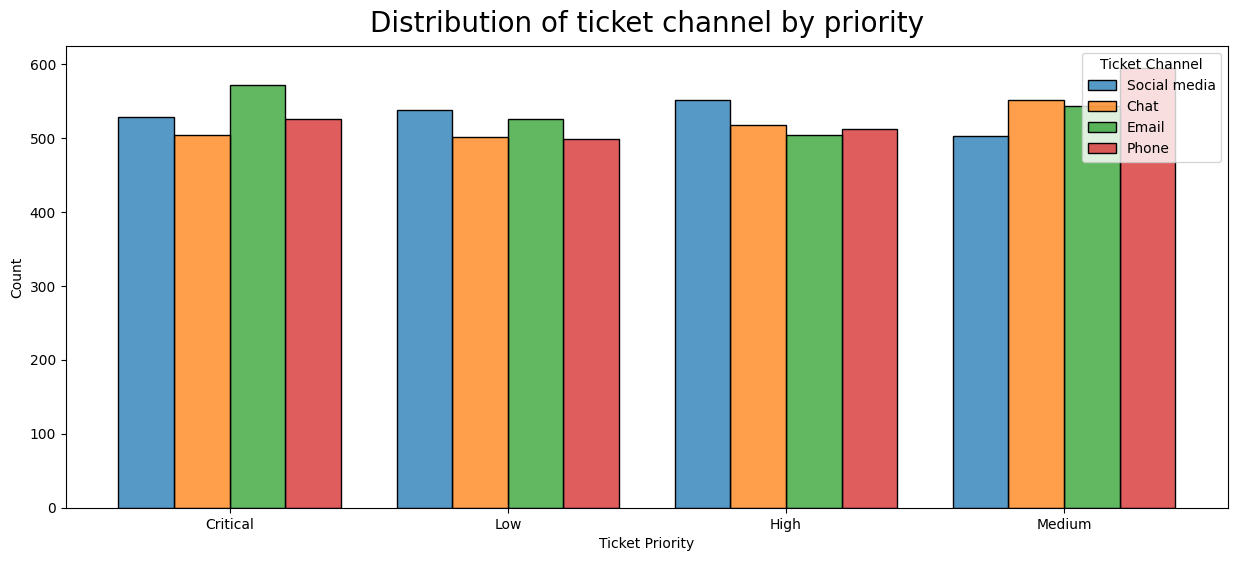

In [23]:
plt.figure(figsize = (15,6))
sns.histplot(df_ticket, hue = 'Ticket Channel', x = 'Ticket Priority',multiple = 'dodge', shrink = 0.8)
plt.title('Distribution of ticket channel by priority', loc = 'center', pad = 10, size = 20)
plt.show()

In [24]:
ticket_st = df_ticket['Ticket Status'].unique()
print(f'Ticket status: {list(ticket_st)}')

Ticket status: ['Pending Customer Response', 'Closed', 'Open']


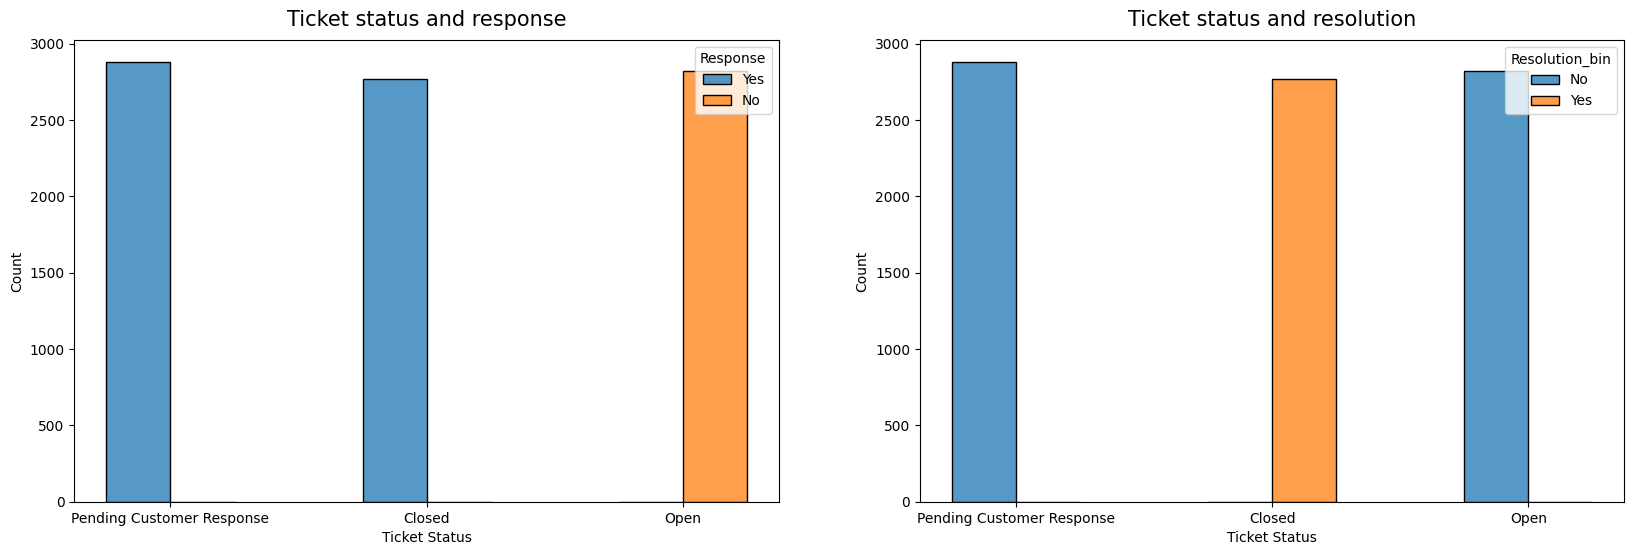

In [25]:
fig, axes = plt.subplots(1,2, figsize = (20,6))
sns.histplot(df_ticket, x = 'Ticket Status', hue = 'Response',multiple = 'dodge', shrink = 0.5, ax = axes[0])
sns.histplot(df_ticket, x = 'Ticket Status', hue = 'Resolution_bin',multiple = 'dodge', shrink = 0.5, ax = axes[1])
axes[0].set_title('Ticket status and response',loc = 'center', pad = 10, size = 15)
axes[1].set_title('Ticket status and resolution',loc = 'center', pad = 10, size = 15)
plt.show()

In [26]:
#Create a pivot table for caculating
priority = pd.pivot_table(df_ticket, index = ['Ticket Priority'], values = ['Customer Name'], columns = ['Resolution_bin'], aggfunc = len).reset_index()
priority = priority.rename(columns = {'Customer Name': 'Chance of Solution'})
priority['Percent'] = (priority['Chance of Solution']['Yes']/priority['Chance of Solution']['No'])*100
priority

Ticket Priority Chance of Solution         Percent
Resolution_bin                                 No  Yes           
0                     Critical               1403  726  51.746258
1                         High               1380  705  51.086957
2                          Low               1419  644  45.384073
3                       Medium               1498  694  46.328438

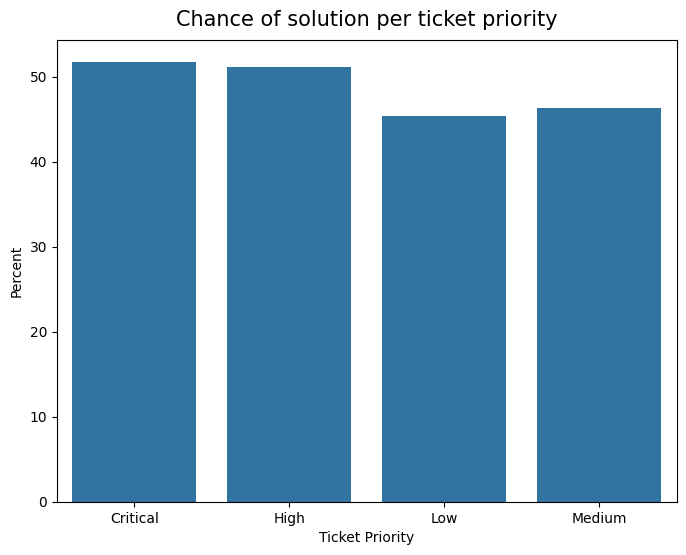

In [27]:
plt.figure(figsize = (8,6))
sns.barplot(priority, x = 'Ticket Priority', y = 'Percent')
plt.title('Chance of solution per ticket priority', loc = 'center', pad = 10, size = 15)
plt.show()

In [28]:
rating = pd.pivot_table(df_ticket, index = ['Customer Satisfaction Rating'], values= ['Customer Name'], columns = ['Resolution_bin'], aggfunc = len).reset_index()
rating = rating.rename(columns = {'Customer Name': 'Resolution'})
rating

Customer Satisfaction Rating Resolution       
Resolution_bin                                      No    Yes
0                                       1.0        NaN  553.0
1                                       2.0        NaN  549.0
2                                       3.0        NaN  580.0
3                                       4.0        NaN  543.0
4                                       5.0        NaN  544.0
5                                 No rating     5700.0    NaN

In [29]:
#Create new dataframe
df_resolution = df_ticket[df_ticket['Resolution_bin'] =='Yes']
df_resolution.head()

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Type of Customer,Response,Resolution_bin
2,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,Middle Age Customer,Yes,Yes
3,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,Young Customer,Yes,Yes
4,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,Old Customer,Yes,Yes
10,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,Middle Age Customer,Yes,Yes
11,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,Middle Age Customer,Yes,Yes


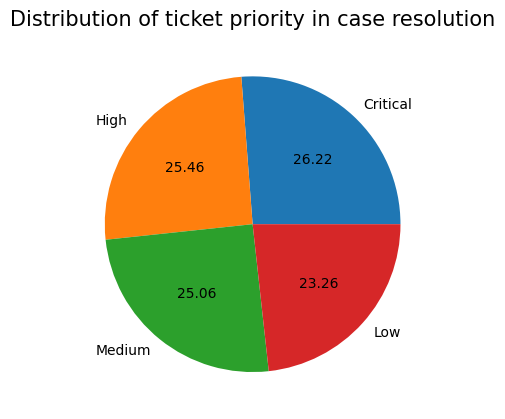

In [30]:
chart_reprio = df_resolution['Ticket Priority'].value_counts()
plt.pie(chart_reprio, labels = chart_reprio.index, autopct = '%.2f')
plt.title('Distribution of ticket priority in case resolution', loc = 'center', pad = 10, size = 15)
plt.show()

In [31]:
rating = []
for i in df_resolution['Customer Satisfaction Rating']:
    if i<=2:
        rating.append('Low')
    elif i==3:
        rating.append('Medium')
    else:
        rating.append('High')
df_resolution['Type of rating'] = rating

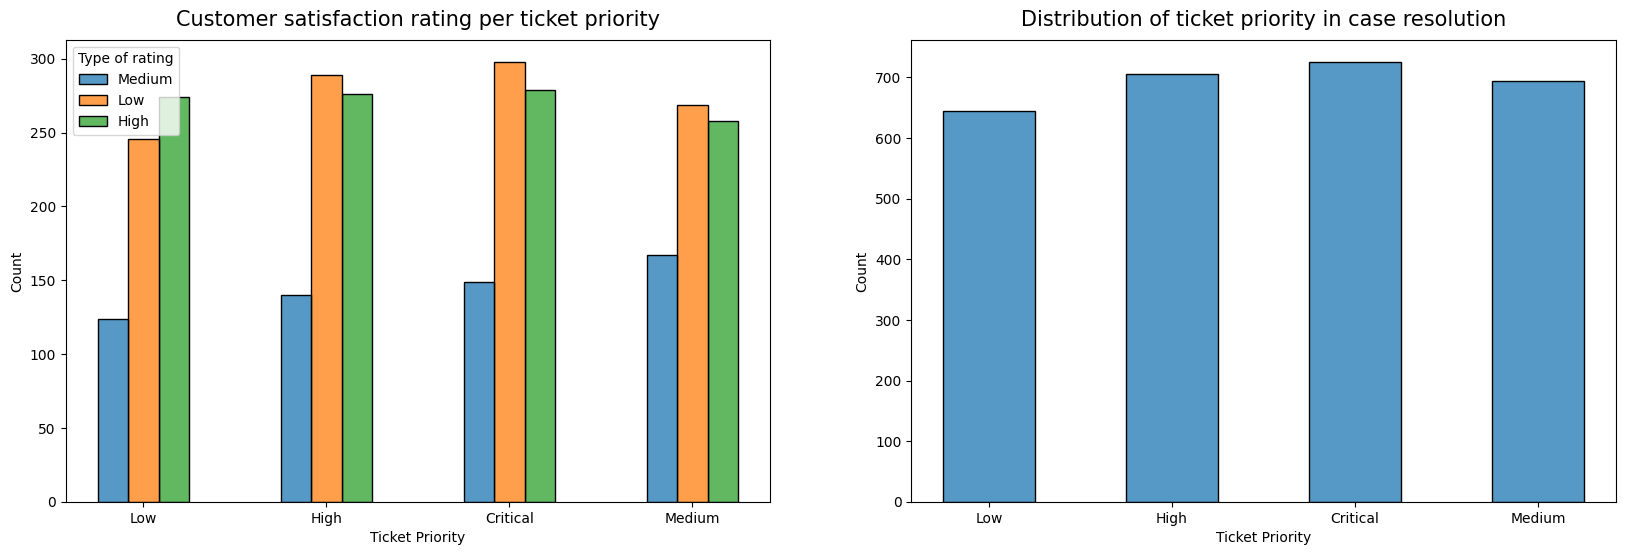

In [32]:
#Customer satisfaction rating and ticket priority
fig, axes = plt.subplots(1,2, figsize = (20,6))
sns.histplot(df_resolution, x = 'Ticket Priority', hue = 'Type of rating' ,multiple = 'dodge', shrink = 0.5, ax = axes[0])
sns.histplot(df_resolution['Ticket Priority'], shrink = 0.5, ax = axes[1])
axes[0].set_title('Customer satisfaction rating per ticket priority', loc = 'center', pad = 10, size = 15)
axes[1].set_title('Distribution of ticket priority in case resolution', loc = 'center', pad = 10, size = 15)
plt.show()


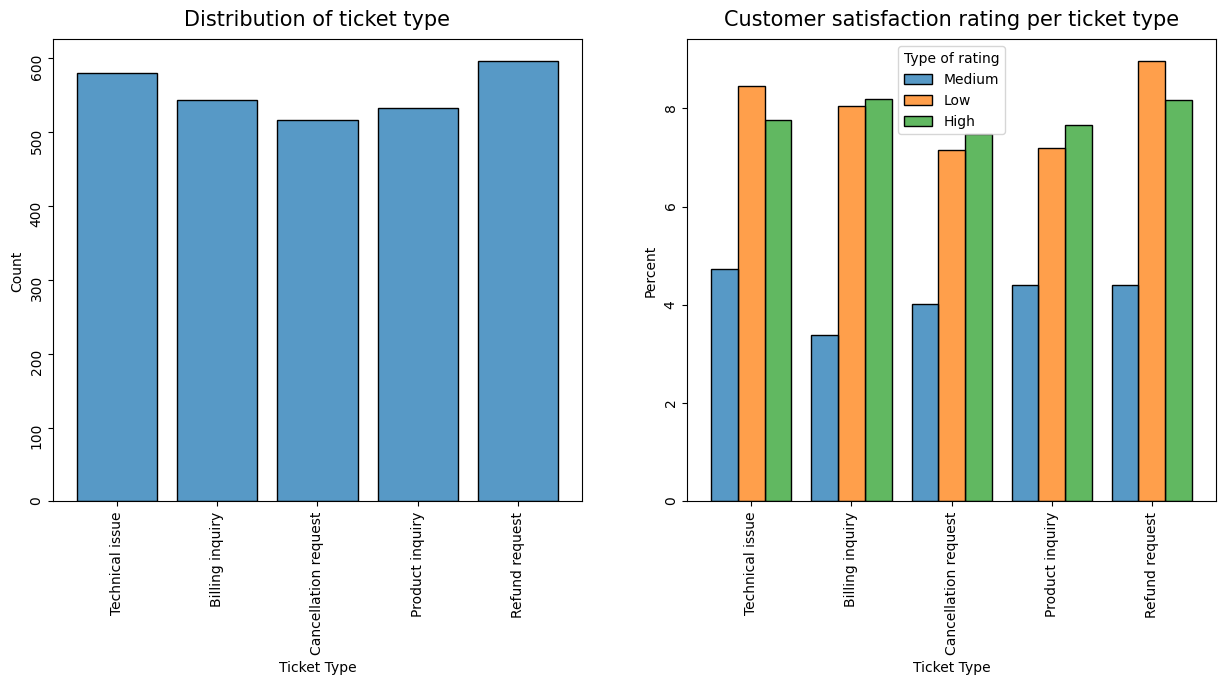

In [33]:

#Customer satisfaction rating and ticket type
fig, axes = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df_resolution['Ticket Type'], shrink = 0.8, ax = axes[0])
sns.histplot(hue = df_resolution['Type of rating'], x = df_resolution['Ticket Type'], multiple = 'dodge', shrink = 0.8, stat = 'percent', ax = axes[1])
axes[0].tick_params(labelrotation = 90)
axes[1].tick_params(labelrotation = 90)
axes[0].set_title('Distribution of ticket type', loc = 'center', pad = 10, size = 15)
axes[1].set_title('Customer satisfaction rating per ticket type', loc = 'center', pad = 10, size = 15)
plt.show()

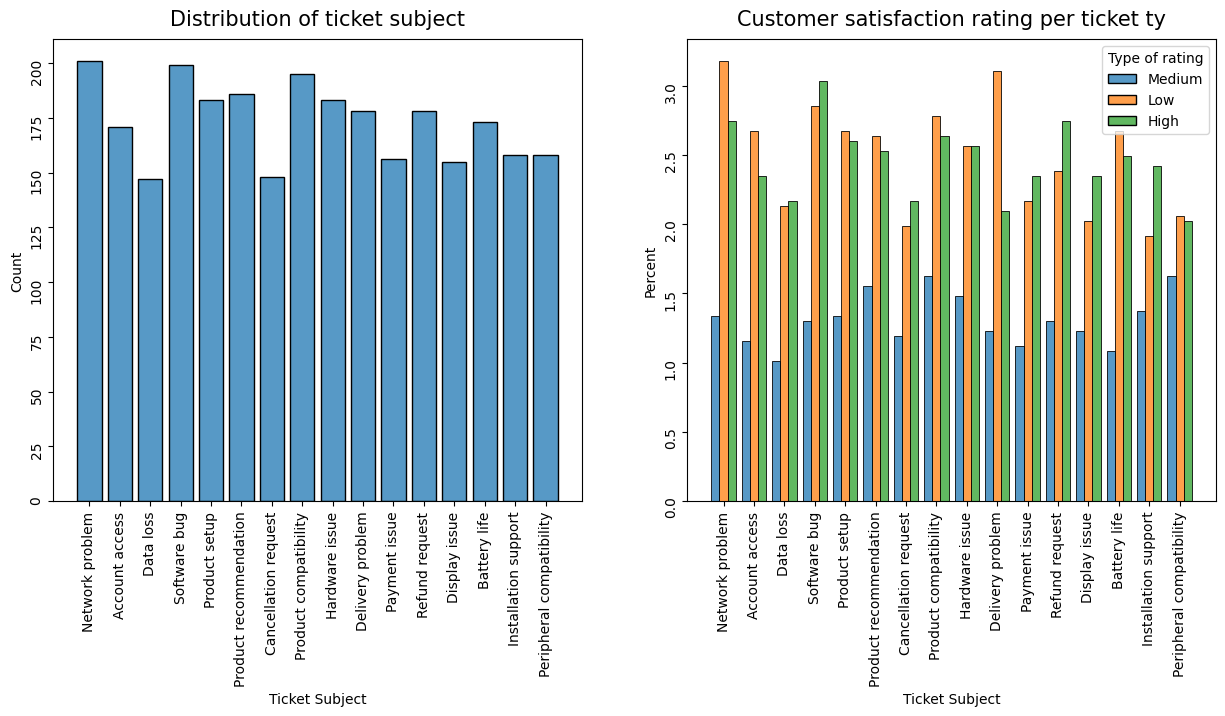

In [34]:
#Customer satisfaction rating and ticket subject
fig, axes = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df_resolution['Ticket Subject'], shrink = 0.8, ax = axes[0])
sns.histplot(hue = df_resolution['Type of rating'], x = df_resolution['Ticket Subject'], multiple = 'dodge', shrink = 0.8, stat = 'percent', ax = axes[1])
axes[0].tick_params(labelrotation = 90)
axes[1].tick_params(labelrotation = 90)
axes[0].set_title('Distribution of ticket subject', loc = 'center', pad = 10, size = 15)
axes[1].set_title('Customer satisfaction rating per ticket ty', loc = 'center', pad = 10, size = 15)
plt.show()

In [35]:
df_sentiment = df_ticket[['Ticket Description', 'Resolution', 'Ticket Priority', 'Ticket Subject', 'Resolution_bin']]
df_sentiment.head()

,Ticket Description,Resolution,Ticket Priority,Ticket Subject,Resolution_bin
0,I'm having an issue with the {product_purchase...,None,Critical,Product setup,No
1,I'm having an issue with the {product_purchase...,None,Critical,Peripheral compatibility,No
2,I'm facing a problem with my {product_purchase...,Case maybe show recently my computer follow.,Low,Network problem,Yes
3,I'm having an issue with the {product_purchase...,Try capital clearly never color toward story.,Low,Account access,Yes
4,I'm having an issue with the {product_purchase...,West decision evidence bit.,Low,Data loss,Yes


In [36]:
#Cleaning text
def clean_text(text):
    text = str(text).lower()
    text = re.sub('[({})?/$#|=]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[.]', ' ', text)
    text = re.sub('[->]', ' ', text)
    text = re.sub('[:]', ' ', text)
    text = re.sub('[_]', ' ', text)
    text = re.sub('[,]', ' ', text)
    text = re.sub('[-]', ' ', text)
    text = re.sub('[\']', ' ', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [37]:
#Apply texts were cleaned in 'Ticket Description' column
df_sentiment['Ticket Description'] = df_sentiment['Ticket Description'].apply(lambda x:clean_text(x))

In [38]:
df_sentiment['Resolution'] = df_sentiment['Resolution'].apply(lambda x:clean_text(x))

In [39]:
#Add useless words to stopwords
new_stopwords = ['i\'m', 'i\'ve', 'would', 'could', '-d', '-i\'m', '[--]:', 'not', 'mm', 'ca', 'cs', 'hi']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

In [40]:
#Write a funtion for removing stopwords
def remove_stopword(x):
    return [y for y in x if y not in stpwrd]

In [41]:
#Creat new column for Description Ticket
df_sentiment['temp1'] = df_sentiment['Ticket Description'].apply(lambda x:str(x).split())
df_sentiment['temp1'] = df_sentiment['temp1'].apply(lambda x:remove_stopword(x))
top = Counter([item for sublist in df_sentiment['temp1'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

<Axes: xlabel='count', ylabel='Common_words'>

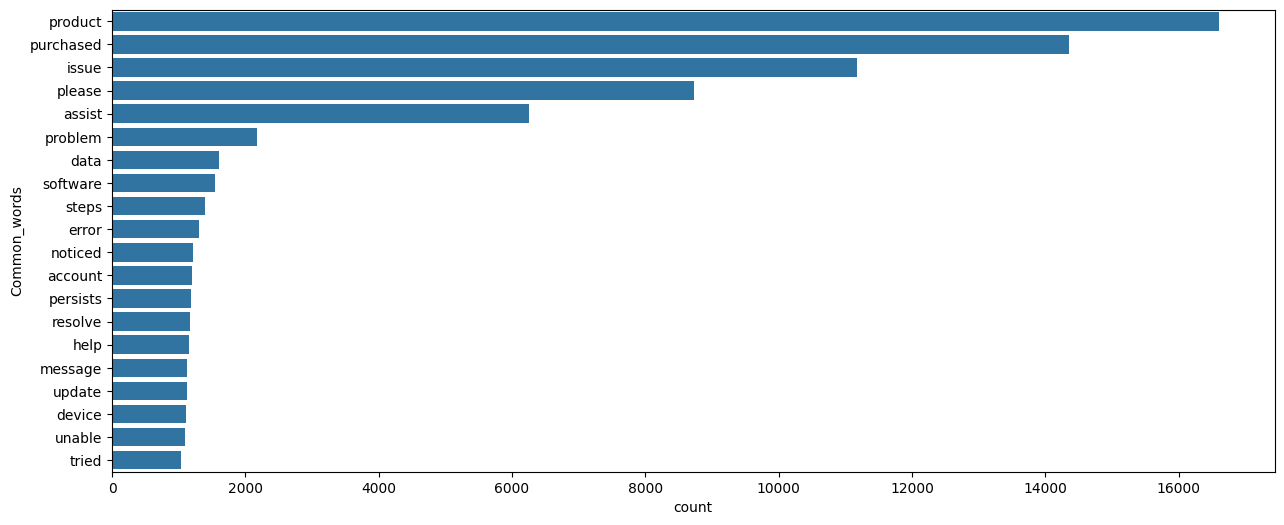

In [42]:
#Plot into chart
plt.figure(figsize = (15,6))
sns.barplot(temp, y = 'Common_words', x = 'count')

In [43]:
df_sentiment_resolution = df_sentiment[df_sentiment['Resolution_bin'] == 'Yes']

In [44]:
df_sentiment_resolution['temp2'] = df_sentiment_resolution['Resolution'].apply(lambda x:str(x).split())
df_sentiment_resolution['temp2'] = df_sentiment_resolution['temp2'].apply(lambda x:remove_stopword(x))
top = Counter([item for sublist in df_sentiment_resolution['temp2'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

<Axes: xlabel='count', ylabel='Common_words'>

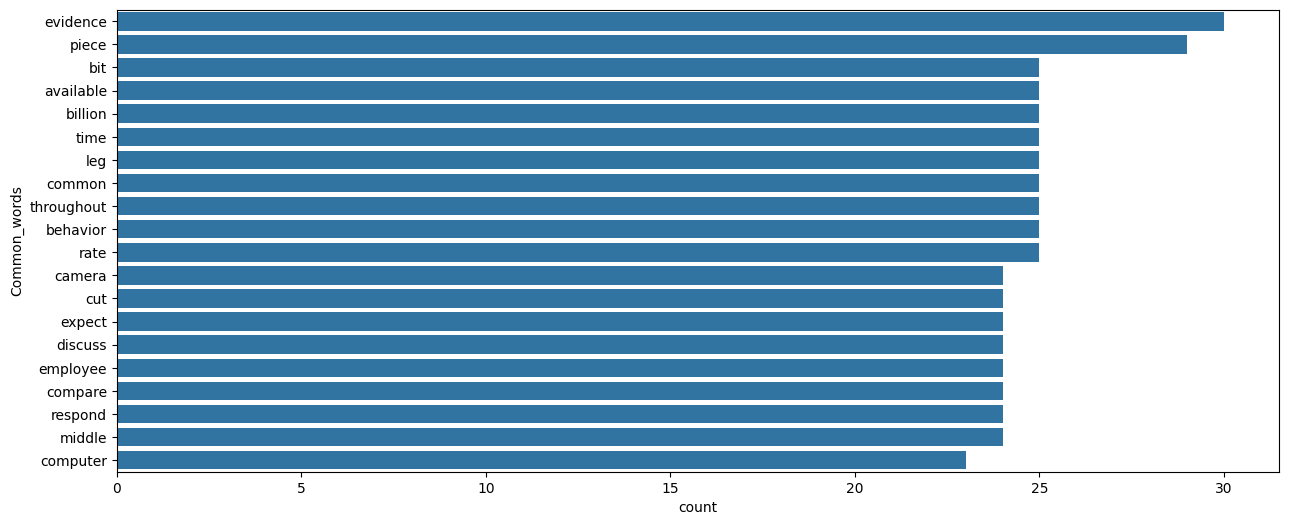

In [45]:
plt.figure(figsize = (15,6))
sns.barplot(temp, y = 'Common_words', x = 'count')

In [46]:
raw_text = [word for word_list in df_sentiment['temp1'] for word in word_list]


In [47]:
def unique_word(sentiment, numwords, raw_words):
    allother = []
    for item in df_sentiment[df_sentiment.Resolution_bin != sentiment]['temp1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))

    specific = [x for x in raw_text if x not in allother]

    mycounter = Counter()

    for item in df_sentiment[df_sentiment.Resolution_bin == sentiment]['temp1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specific)

    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])

    return Unique_words


In [48]:
resolve = unique_word('Yes', 20, raw_text)
resolve.style.background_gradient(cmap='Greens')

,words,count
0,consumers,4
1,font,4
2,gist,4
3,batteries,4
4,bottles,4
5,knowing,4
6,therefore,4
7,sentencethe,4
8,youtu,4
9,blockchain,3


In [49]:
none = unique_word('No', 20, raw_text)
none.style.background_gradient(cmap='Blues')

,words,count
0,property,12
1,perfect,9
2,gaming,9
3,decided,8
4,wants,8
5,platform,8
6,]game,8
7,suggest,7
8,isp,7
9,willing,7


In [50]:
df_sentiment_resolution

,Ticket Description,Resolution,Ticket Priority,Ticket Subject,Resolution_bin,temp1,temp2
2,i m facing a problem with my product purchased...,case maybe show recently my computer follow,Low,Network problem,Yes,"[facing, problem, product, purchased, product,...","[case, maybe, show, recently, computer, follow]"
3,i m having an issue with the product purchased...,try capital clearly never color toward story,Low,Account access,Yes,"[issue, product, purchased, please, assist, pr...","[try, capital, clearly, never, color, toward, ..."
4,i m having an issue with the product purchased...,west decision evidence bit,Low,Data loss,Yes,"[issue, product, purchased, please, assist, no...","[west, decision, evidence, bit]"
10,i m having an issue with the product purchased...,measure tonight surface feel forward,High,Data loss,Yes,"[issue, product, purchased, please, assist, pr...","[measure, tonight, surface, feel, forward]"
11,i m having an issue with the product purchased...,measure there house management pick knowledge ...,High,Software bug,Yes,"[issue, product, purchased, please, assist, po...","[measure, house, management, pick, knowledge, ..."
...,...,...,...,...,...,...,...
8452,i m having an issue with the product purchased...,interesting show must successful,Critical,Display issue,Yes,"[issue, product, purchased, please, assist, –,...","[interesting, show, must, successful]"
8453,the product purchased is unable to establish a...,skill expect admit and,High,Peripheral compatibility,Yes,"[product, purchased, unable, establish, stable...","[skill, expect, admit]"
8455,i ve recently set up my product purchased but...,say position key appear behavior,High,Refund request,Yes,"[recently, set, product, purchased, fails, con...","[say, position, key, appear, behavior]"
8466,i m having an issue with the product purchased...,eight account century nature kitchen,High,Account access,Yes,"[issue, product, purchased, please, assist, us...","[eight, account, century, nature, kitchen]"


In [51]:
def unique_word(sentiment, numwords, raw_words):
    allother = []
    for item in df_sentiment_resolution[df_sentiment_resolution.Resolution_bin != sentiment]['temp2']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))

    specific = [x for x in raw_text if x not in allother]

    mycounter = Counter()

    for item in df_sentiment_resolution[df_sentiment_resolution.Resolution_bin == sentiment]['temp2']:
        for word in item:
            mycounter[word] += 1
    keep = list(specific)

    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])

    return Unique_words

In [52]:
resolve = unique_word('Yes', 20, raw_text)
resolve.style.background_gradient(cmap='Greens')

,words,count
0,piece,29
1,bit,25
2,available,25
3,time,25
4,common,25
5,behavior,25
6,rate,25
7,camera,24
8,cut,24
9,expect,24


In [53]:
#Caculate the interval between time to resolution and first response time
df_resolution['Interval'] = df_resolution['Time to Resolution'] - df_resolution['First Response Time']

In [54]:

#Funtion
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=30, figure_size=(20,10), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)



    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=400,
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

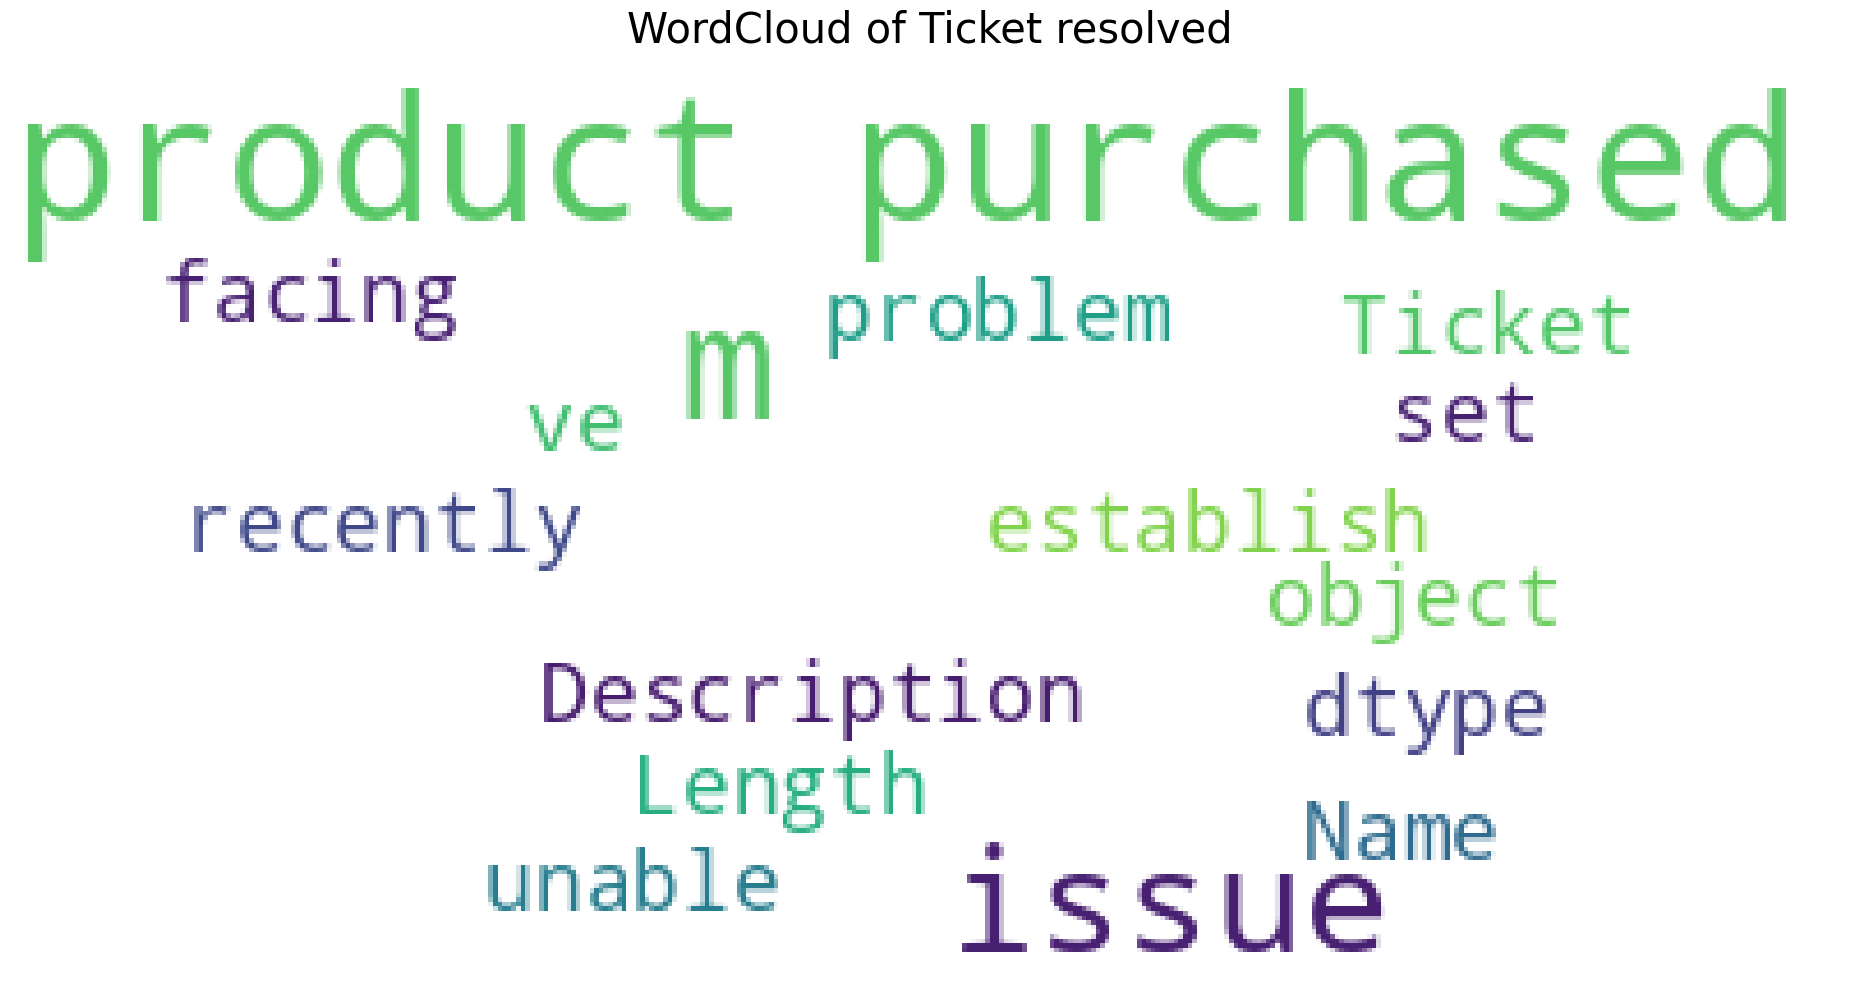

In [55]:
plot_wordcloud(df_sentiment[df_sentiment['Resolution_bin'] == 'Yes']['Ticket Description'],mask=None,color='white',max_font_size=50,title_size=30,title="WordCloud of Ticket resolved")

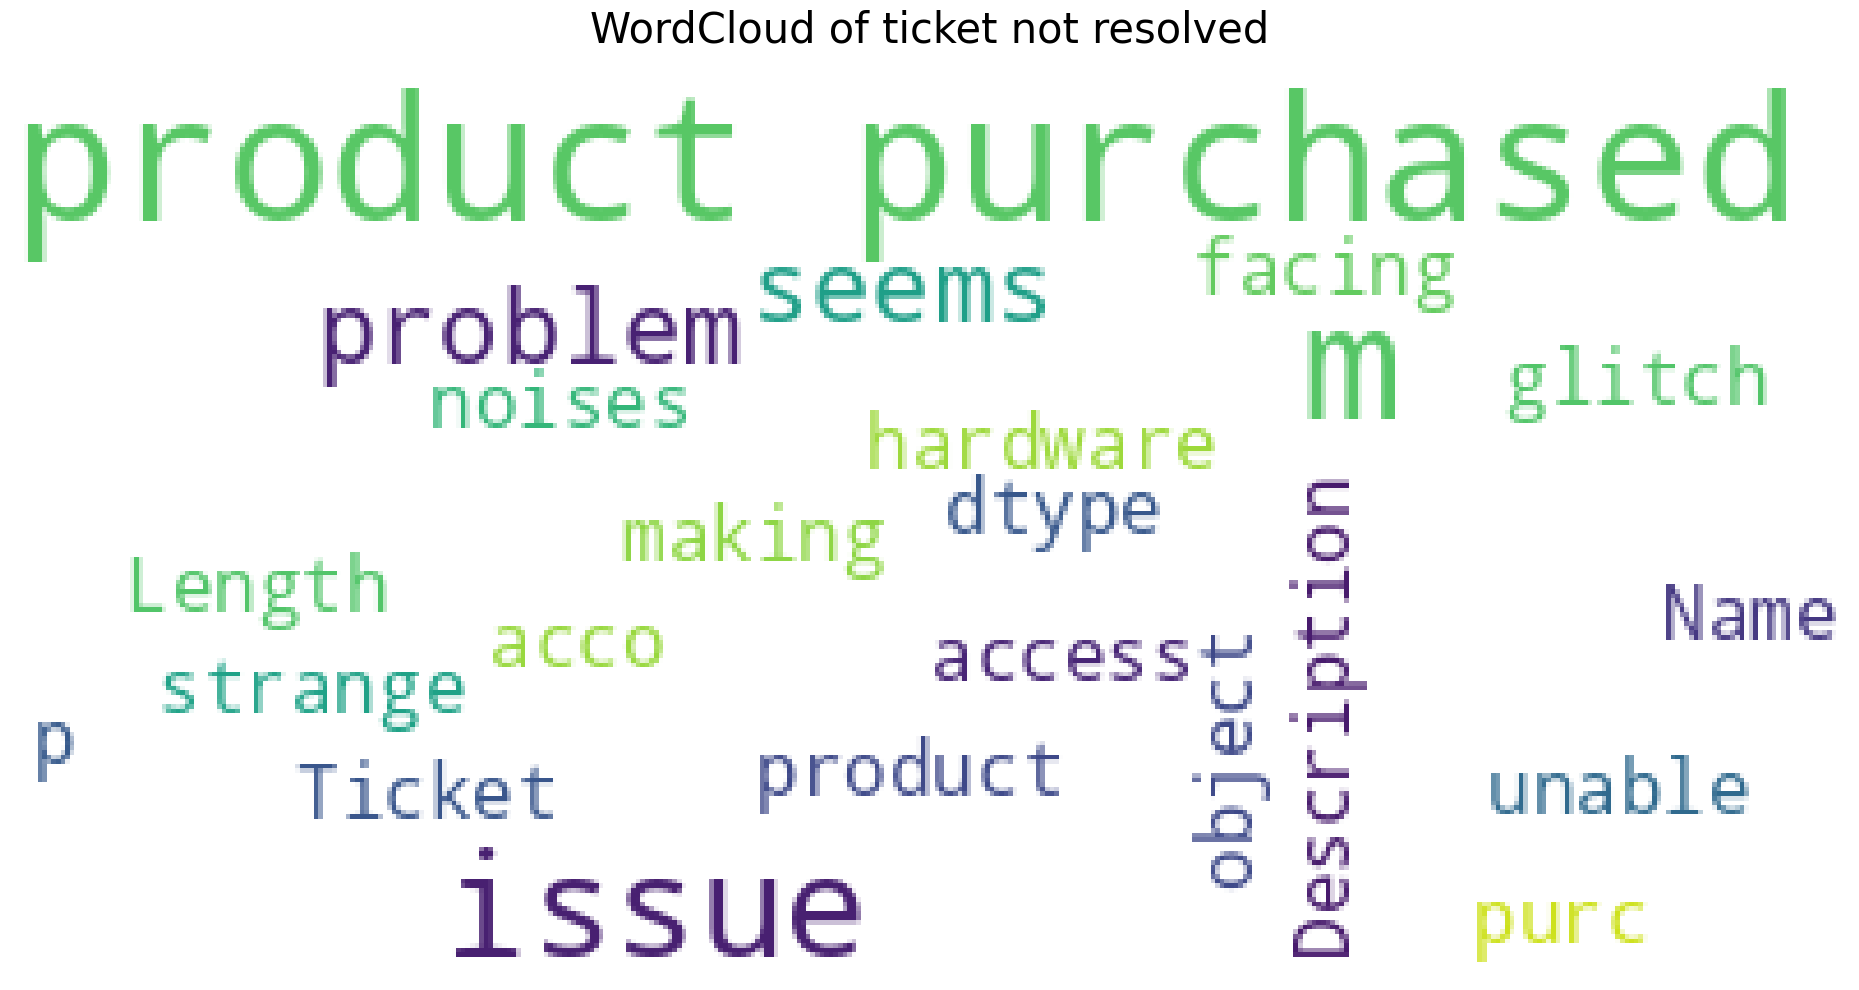

In [56]:
plot_wordcloud(df_sentiment[df_sentiment['Resolution_bin'] == 'No']['Ticket Description'],mask=None,color='white',max_font_size=50,title_size=30,title="WordCloud of ticket not resolved")

In [57]:
#Caculate the interval between time to resolution and first response time
df_resolution['Interval'] = df_resolution['Time to Resolution'] - df_resolution['First Response Time']

In [58]:
# Assuming the 'Interval' column contains durations in the format '0 days HH:MM:SS'
# Convert the 'Interval' column to timedelta
df_resolution['Interval'] = pd.to_timedelta(df_resolution['Interval'])

# Convert timedelta to hours and round to 2 decimal places
df_resolution['Interval'] = round(df_resolution['Interval'].dt.total_seconds() / 3600, 2)


In [59]:
df_resolution['Interval'].describe()

count    2769.000000
mean       -0.057703
std         9.564164
min       -23.230000
25%        -6.930000
50%         0.170000
75%         6.480000
max        23.470000
Name: Interval, dtype: float64

<Axes: xlabel='Interval', ylabel='Customer Satisfaction Rating'>

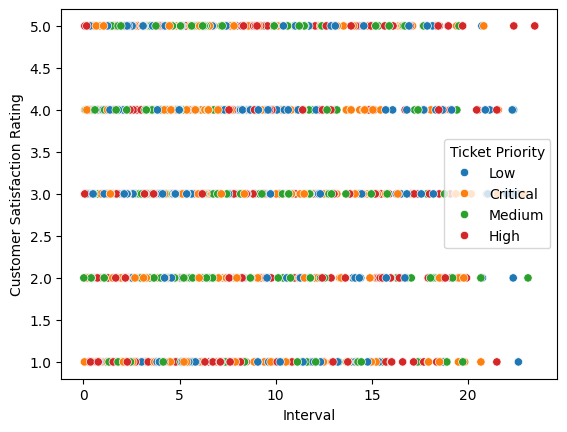

In [60]:
sns.scatterplot(df_resolution[df_resolution['Interval'] > 0], x= 'Interval', y = 'Customer Satisfaction Rating', hue = 'Ticket Priority')

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix


In [62]:
label = df_resolution[['Customer Gender', 'Ticket Type', 'Ticket Subject', 'Ticket Priority', 'Ticket Channel', 'Type of Customer', 'Type of rating']]
encoder = LabelEncoder()
for col in label:
    value = np.unique(df_resolution[col])
    df_resolution[col] = encoder.fit_transform(df_resolution[col])
    encode_value = encoder.transform(value)

In [63]:
df_resolution.head()

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,...,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Type of Customer,Response,Resolution_bin,Type of rating,Interval
2,Christopher Robbins,gonzalestracy@example.com,48,2,Dell XPS,2020-07-14,4,8,I'm facing a problem with my {product_purchase...,Closed,...,2,3,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,0,Yes,Yes,2,6.85
3,Christina Dillon,bradleyolson@example.org,27,0,Microsoft Office,2020-11-13,0,0,I'm having an issue with the {product_purchase...,Closed,...,2,3,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2,Yes,Yes,2,-5.53
4,Alexander Carroll,bradleymark@example.com,67,0,Autodesk AutoCAD,2020-02-04,0,3,I'm having an issue with the {product_purchase...,Closed,...,2,1,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,1,Yes,Yes,1,19.68
10,Joseph Moreno,mbrown@example.org,48,1,Nintendo Switch,2021-01-19,1,3,I'm having an issue with the {product_purchase...,Closed,...,1,2,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,0,Yes,Yes,1,-17.92
11,Brandon Arnold,davisjohn@example.net,51,1,Microsoft Xbox Controller,2021-10-24,2,15,I'm having an issue with the {product_purchase...,Closed,...,1,0,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,0,Yes,Yes,1,-2.63


In [64]:
y = df_resolution['Type of rating']
X = df_resolution.drop(columns = ['Customer Name', 'Customer Email', 'Customer Age', 'Product Purchased', 'Date of Purchase',
                                 'Ticket Description', 'Ticket Status', 'First Response Time', 'Time to Resolution', 'Response',
                                 'Resolution_bin' ,'Resolution'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [65]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

In [66]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [67]:
y_pred = model.predict(X_test)

In [68]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       115

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



<Axes: >

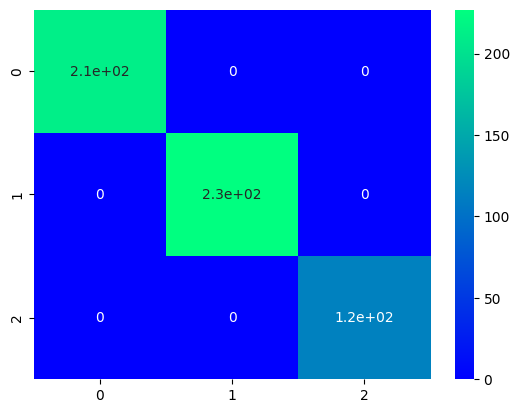

In [69]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, cmap = 'winter', annot = True)

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [73]:


# Preprocess text data
texts = df['Ticket Description'].astype(str)
texts = texts.apply(lambda x: x.lower())

# Encode categorical variables
label_encoder = LabelEncoder()
df['Ticket Priority'] = label_encoder.fit_transform(df['Ticket Priority'])
df['Ticket Channel'] = label_encoder.fit_transform(df['Ticket Channel'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, df['Ticket Priority'], test_size=0.2, random_state=42)

# Tokenize text data
max_words = 1000
maxlen = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Define the model
embedding_dim = 50
num_classes = len(label_encoder.classes_)
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Softmax activation for multi-class classification

# Compile the model
optimizer = RMSprop(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


NameError: name 'GlobalMaxPooling1D' is not defined

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2

# Preprocess text data
texts = df['Ticket Description'].astype(str)
texts = texts.apply(lambda x: x.lower())

# Encode categorical variables
label_encoder = LabelEncoder()
df['Ticket Priority'] = label_encoder.fit_transform(df['Ticket Priority'])
df['Ticket Channel'] = label_encoder.fit_transform(df['Ticket Channel'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, df['Ticket Priority'], test_size=0.2, random_state=42)

# Tokenize text data
max_words = 1000
maxlen = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Define the model with improved architecture, hyperparameters, and regularization
embedding_dim = 50
num_classes = len(label_encoder.classes_)
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Softmax activation for multi-class classification

# Compile the model with RMSprop optimizer and adjusted learning rate
optimizer = RMSprop(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/20
212/212 [==============================] - 2s 7ms/step - loss: 1.4190 - accuracy: 0.2461 - val_loss: 1.3859 - val_accuracy: 0.2710
Epoch 2/20
212/212 [==============================] - 1s 5ms/step - loss: 1.3873 - accuracy: 0.2481 - val_loss: 1.3858 - val_accuracy: 0.2710
Epoch 3/20
212/212 [==============================] - 1s 6ms/step - loss: 1.3871 - accuracy: 0.2559 - val_loss: 1.3863 - val_accuracy: 0.2426
Epoch 4/20
212/212 [==============================] - 2s 8ms/step - loss: 1.3867 - accuracy: 0.2497 - val_loss: 1.3875 - val_accuracy: 0.2450
Epoch 5/20
212/212 [==============================] - 2s 9ms/step - loss: 1.3871 - accuracy: 0.2508 - val_loss: 1.3877 - val_accuracy: 0.2426
Epoch 6/20
212/212 [==============================] - 3s 14ms/step - loss: 1.3871 - accuracy: 0.2517 - val_loss: 1.3856 - val_accuracy: 0.2710
Epoch 7/20
212/212 [==============================] - 1s 5ms/step - loss: 1.3872 - accuracy: 0.2486 - val_loss: 1.3857 - val_accuracy: 0.2710
Epoch

In [82]:


from keras.wrappers.scikit_learn import KerasClassifier

# Preprocess text data
texts = df['Ticket Description'].astype(str)
texts = texts.apply(lambda x: x.lower())

# Encode categorical variables
label_encoder = LabelEncoder()
df['Ticket Priority'] = label_encoder.fit_transform(df['Ticket Priority'])
df['Ticket Channel'] = label_encoder.fit_transform(df['Ticket Channel'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, df['Ticket Priority'], test_size=0.2, random_state=42)

# Implement strategies for improving the model

# 1. Hyperparameter Tuning
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.3, 0.4]
}
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

# 2. Feature Engineering
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 3. Data Augmentation
eda = EDA()
X_train_augmented = eda(X_train)

# 4. Ensemble Methods
model1 = create_model()
model2 = create_model()
model3 = create_model()
ensemble_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)], voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred)

# 5. Advanced Architectures
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 6. Regularization
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))

# 7. Transfer Learning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 8. Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold)

# Define the model
embedding_dim = 50
num_classes = len(label_encoder.classes_)
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Softmax activation for multi-class classification

# Compile the model
optimizer = RMSprop(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


NameError: name 'create_model' is not defined

In [81]:
# Ensure proper encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Ticket Priority'] = label_encoder.fit_transform(df['Ticket Priority'])
df['Ticket Channel'] = label_encoder.fit_transform(df['Ticket Channel'])

# Padding sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 1000
maxlen = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

X_seq = tokenizer.texts_to_sequences(texts)
X_pad = pad_sequences(X_seq, maxlen=maxlen)


In [72]:
df["Ticket Type"].unique()

array(['Technical issue', 'Billing inquiry', 'Cancellation request',
       'Product inquiry', 'Refund request'], dtype=object)

In [77]:
# Check unique values of labels
unique_labels = np.unique(y_train)
print("Unique labels:", unique_labels)

# Ensure that labels are within the valid range
num_classes = len(unique_labels)
print("Number of classes:", num_classes)

# If necessary, re-encode the labels
if num_classes > 1:
    # Subtract the minimum label value to ensure labels start from 0
    y_train = y_train - np.min(y_train)
    y_test = y_test - np.min(y_test)
    # Recheck unique values of labels
    unique_labels = np.unique(y_train)
    print("Updated unique labels:", unique_labels)


Unique labels: [0 1 2 3]
Number of classes: 4
Updated unique labels: [0 1 2 3]


In [78]:
# Check for missing values in input data and labels
print("Missing values in X_train_pad:", np.isnan(X_train_pad).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
print("Missing values in X_test_pad:", np.isnan(X_test_pad).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())


Missing values in X_train_pad: 0
Missing values in y_train: 0
Missing values in X_test_pad: 0
Missing values in y_test: 0


In [79]:
# Print the shape of input data
print("Shape of X_train_pad:", X_train_pad.shape)
print("Shape of X_test_pad:", X_test_pad.shape)

# Ensure that the input shape matches the expected input shape of your LSTM model
# For example, if your LSTM model expects input shape (batch_size, maxlen), verify that X_train_pad and X_test_pad have the same maxlen dimension


Shape of X_train_pad: (6775, 100)
Shape of X_test_pad: (1694, 100)


In [80]:
# Print the summary of your model to inspect its architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           50000     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                      